In [1]:
% matplotlib inline
from plot_setup import *
import model_definition as model
import seaborn as sns
#sns.set(style="ticks",palette="tab10")
sns.set_style('whitegrid')
sns.set_palette("tab10",10)
import matplotlib

#args_pairplot = {"size":5,"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
args_pairplot = {"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}

def mypairplot(
    mcchain,
    scatter_kws={"s":8,"marker":"o","alpha":0.1},
    kde_kws={"shade":True,"shade_lowest":False,"cmap":"jet"},
    hist_kws={"bins":32,"histtype":"stepfilled","alpha":0.3},
    **kws):
    
    print("Note: The following warnings occur, but no problem.\nUserWarning: The following kwargs were not used by contour: 'label', 'color' ")
    g = sns.PairGrid(mcchain,**kws)
    g = g.map_upper(plt.scatter,**scatter_kws)
    g = g.map_lower(sns.kdeplot,**kde_kws)
    g = g.map_diag(plt.hist, **hist_kws)
    return g

# mock stars

In [40]:
# read mocks
mock_mem,mock_fg = pd.read_csv("mock_mem_v004.csv"),pd.read_csv("mock_fg_v004.csv")
#mock_mem = mock_mem.append(pd.read_csv("mock_mem_v002.csv"),ignore_index=True)
#mock_fg = mock_fg.append(pd.read_csv("mock_fg_v002.csv"),ignore_index=True)
mock_mem["kind"],mock_fg["kind"] = "mem","fg"
mock_tot = mock_mem.append(mock_fg,ignore_index=True)

#mock_plummerlike_mem,mock_plummerlike_fg = pd.read_csv("mock_plummerlike_sampled_mem.csv"),pd.read_csv("mock_plummerlike_sampled_fg.csv")
#mock_plummerlike_mem["kind"],mock_plummerlike_fg["kind"] = "mem","fg"
#mock_plummerlike_tot = mock_plummerlike_mem.append(mock_plummerlike_fg,ignore_index=True)
mock_plummerlike_tot = pd.read_csv("mock_plummerlike_sampled_v002.csv")

#mock_flatten_mem,mock_flatten_fg = pd.read_csv("mock_flatten_sampled_mem.csv"),pd.read_csv("mock_flatten_sampled_fg.csv")
#mock_flatten_mem["kind"],mock_flatten_fg["kind"] = "mem","fg"
#mock_flatten_tot = mock_flatten_mem.append(mock_flatten_fg,ignore_index=True)
mock_flatten_tot = pd.read_csv("mock_flatten_sampled_v002.csv")

In [32]:
print(pd.Series(model.initial_parameters),"\n")
print(pd.Series({"RoI_v_lo":model.RoI_v_lo,"RoI_v_hi":model.RoI_v_hi,"RoI_R":model.RoI_R}))

r_e      100.0
v_mem     50.0
a         10.0
b         10.0
v_fg     200.0
dv_fg    200.0
s          0.5
dtype: float64 

RoI_v_lo      0
RoI_v_hi    100
RoI_R       200
dtype: int64


In [32]:
mock_fg

,R,v,kind
0,186.914144,90.188345,fg
1,186.914144,90.188345,fg
2,159.691417,65.946061,fg
3,192.157114,61.519567,fg
4,176.697412,36.793927,fg
5,163.877378,26.358362,fg
6,199.212598,14.746682,fg
7,140.898828,31.604968,fg
8,101.946965,55.686313,fg
9,88.426483,43.399402,fg


In [44]:
mock_plummerlike_tot.describe()

,Unnamed: 0,R,v
count,16268.000000,16268.000000,16268.000000
mean,21679.581264,71.235897,51.217302
std,14290.722082,44.360531,21.090385
min,1.000000,0.242345,0.004391
25%,9809.750000,37.051470,37.883779
50%,19578.500000,61.419373,50.874661
75%,32485.500000,96.922554,64.490371
max,51601.000000,199.912034,99.997321


## unbiased mock

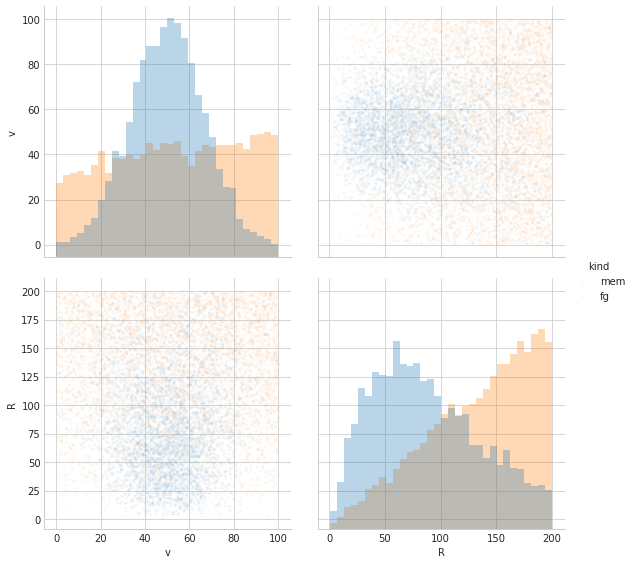

In [41]:
sns.pairplot(
    mock_tot,vars=("v","R"),hue="kind",hue_order=("mem","fg"),size=4,
    plot_kws={"s":8,"marker":"o","alpha":0.05},
    diag_kws={"bins":32,"histtype":"stepfilled","alpha":0.3,"stacked":False}
)
#from scipy.stats import truncnorm
#args_truncnorm = {"loc":model.initial_parameters_mem["v_mem"],"scale":model.initial_parameters_mem["dv_fg"]}
#args_truncnorm["a"] = (model.RoI_v_lo-args_truncnorm["loc"])/args_truncnorm["scale"]
#args_truncnorm["b"] = (model.RoI_v_hi-args_truncnorm["loc"])/args_truncnorm["scale"]
#vs = np.linspace(model.RoI_v_lo,model.RoI_v_hi,32)
#prob_v_fg = model.initial_parameters["s"]*truncnorm.pdf(np.linspace(model.RoI_v_lo,model.RoI_v_hi,32),**args_truncnorm)
#print(g.axes[0,0].plot())

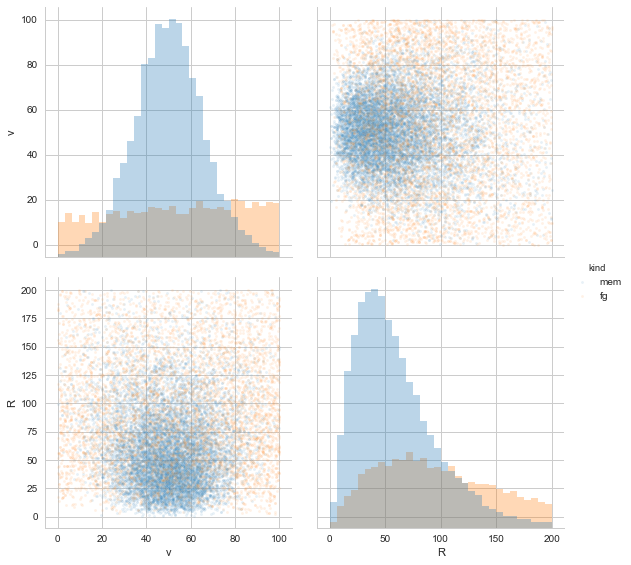

In [56]:
sns.pairplot(
    mock_plummerlike_tot,vars=("v","R"),hue="kind",hue_order=("mem","fg"),size=4,
    plot_kws={"s":8,"marker":"o","alpha":0.1},
    diag_kws={"bins":32,"histtype":"stepfilled","alpha":0.3}
)

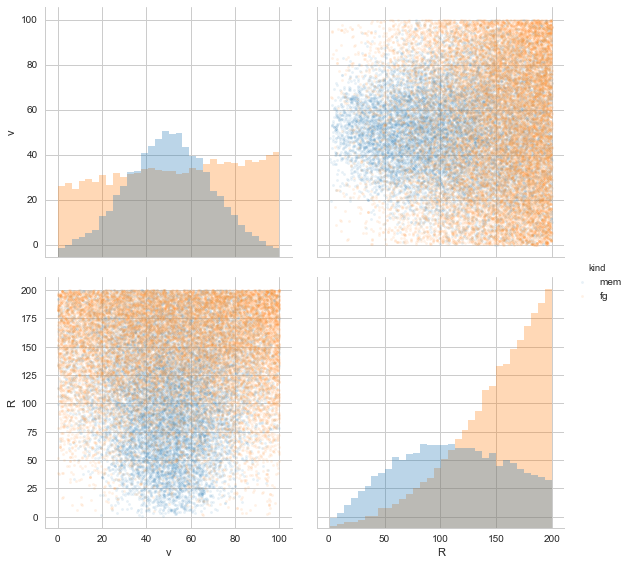

In [57]:
sns.pairplot(
    mock_flatten_tot,vars=("v","R"),hue="kind",hue_order=("mem","fg"),size=4,
    plot_kws={"s":8,"marker":"o","alpha":0.1},
    diag_kws={"bins":32,"histtype":"stepfilled","alpha":0.3}
)

In [145]:
from scipy.integrate import quad
from model_definition import dist_func_mem, dist_func_fg
from model_definition import initial_parameters_mem, initial_parameters_fg
r_e = initial_parameters_mem["r_e"]
normed_sigma_fg = quad(lambda v: dist_func_fg(v,r_e,**initial_parameters_fg), model.RoI_v_lo,model.RoI_v_hi)[0]/quad(lambda v: dist_func_mem(v,r_e,**initial_parameters_mem), model.RoI_v_lo,model.RoI_v_hi)[0]
print("normed_sigma_fg:",normed_sigma_fg)
s_flatten,s_plummerlike = 1/(1+len(mock_flatten_fg)/len(mock_flatten_mem)),1/(1+len(mock_plummerlike_fg)/len(mock_plummerlike_mem))
print("s_flatten:",s_flatten, " --> normed_sigma_fg_flatten:",(1-s_flatten)/s_flatten * normed_sigma_fg )
print("s_plummerlike:",s_plummerlike, " --> normed_sigma_fg_plummerlike:",(1-s_plummerlike)/s_plummerlike * normed_sigma_fg)
# ????? is it true ????

normed_sigma_fg: 0.7962369769130824
s_flatten: 0.418  --> normed_sigma_fg_flatten: 1.1086361735966843
s_plummerlike: 0.5767857142857142  --> normed_sigma_fg_plummerlike: 0.584235800397525


In [188]:
delta_r_list = 0.5, 1, 2, 3, 4, 5
r_e = initial_parameters_mem["r_e"]
for i in range(len(delta_r_list)):
    delta_r = delta_r_list[i]
    is_near_r_e = lambda r : (r-(r_e+delta_r))*(r-(r_e-delta_r)) < 0
    count_near_r_e = lambda mock_mem,mock_fg: (len(mock_mem[is_near_r_e(mock_mem.R)]), len(mock_fg[is_near_r_e(mock_fg.R)]))
    n_mem,n_fg = count_near_r_e(mock_mem,mock_fg); print(n_mem,n_fg)
    n_mem_flatten,n_fg_flatten = count_near_r_e(mock_flatten_mem,mock_flatten_fg); print(n_mem_flatten,n_fg_flatten)
    n_mem_plummerlike,n_fg_plummerlike = count_near_r_e(mock_plummerlike_mem,mock_plummerlike_fg); print(n_mem_plummerlike,n_fg_plummerlike)
    normed_sigma_fg_tot = len(mock_fg[is_near_r_e(mock_fg.R)])/len(mock_mem[is_near_r_e(mock_mem.R)])
    normed_sigma_fg_flatten = len(mock_flatten_fg[is_near_r_e(mock_flatten_fg.R)])/len(mock_flatten_mem[is_near_r_e(mock_flatten_mem.R)])
    normed_sigma_fg_plummerlike = len(mock_plummerlike_fg[is_near_r_e(mock_plummerlike_fg.R)])/len(mock_plummerlike_mem[is_near_r_e(mock_plummerlike_mem.R)])
    print("normed_sigma_fg_tot:",normed_sigma_fg_tot)
    print("normed_sigma_fg_flatten:",normed_sigma_fg_flatten )
    print("normed_sigma_fg_plummerlike:",normed_sigma_fg_plummerlike)

33 24
19 8
13 9
normed_sigma_fg_tot: 0.7272727272727273
normed_sigma_fg_flatten: 0.42105263157894735
normed_sigma_fg_plummerlike: 0.6923076923076923
63 53
33 22
27 28
normed_sigma_fg_tot: 0.8412698412698413
normed_sigma_fg_flatten: 0.6666666666666666
normed_sigma_fg_plummerlike: 1.037037037037037
134 110
73 50
54 55
normed_sigma_fg_tot: 0.8208955223880597
normed_sigma_fg_flatten: 0.684931506849315
normed_sigma_fg_plummerlike: 1.0185185185185186
205 163
114 81
83 84
normed_sigma_fg_tot: 0.7951219512195122
normed_sigma_fg_flatten: 0.7105263157894737
normed_sigma_fg_plummerlike: 1.0120481927710843
264 219
142 114
113 109
normed_sigma_fg_tot: 0.8295454545454546
normed_sigma_fg_flatten: 0.8028169014084507
normed_sigma_fg_plummerlike: 0.9646017699115044
322 287
165 147
134 139
normed_sigma_fg_tot: 0.8913043478260869
normed_sigma_fg_flatten: 0.8909090909090909
normed_sigma_fg_plummerlike: 1.037313432835821


## MCMC: KI17

In [45]:
pd.read_csv("mclog_KI17_v003.csv")

,a,b,s,v_mem,iter_num
0,0.200000,0.200000,0.010000,0.200000,5000
1,0.493967,0.779836,0.009743,0.320239,5000
2,0.524840,0.825628,0.011120,0.336269,25000


Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

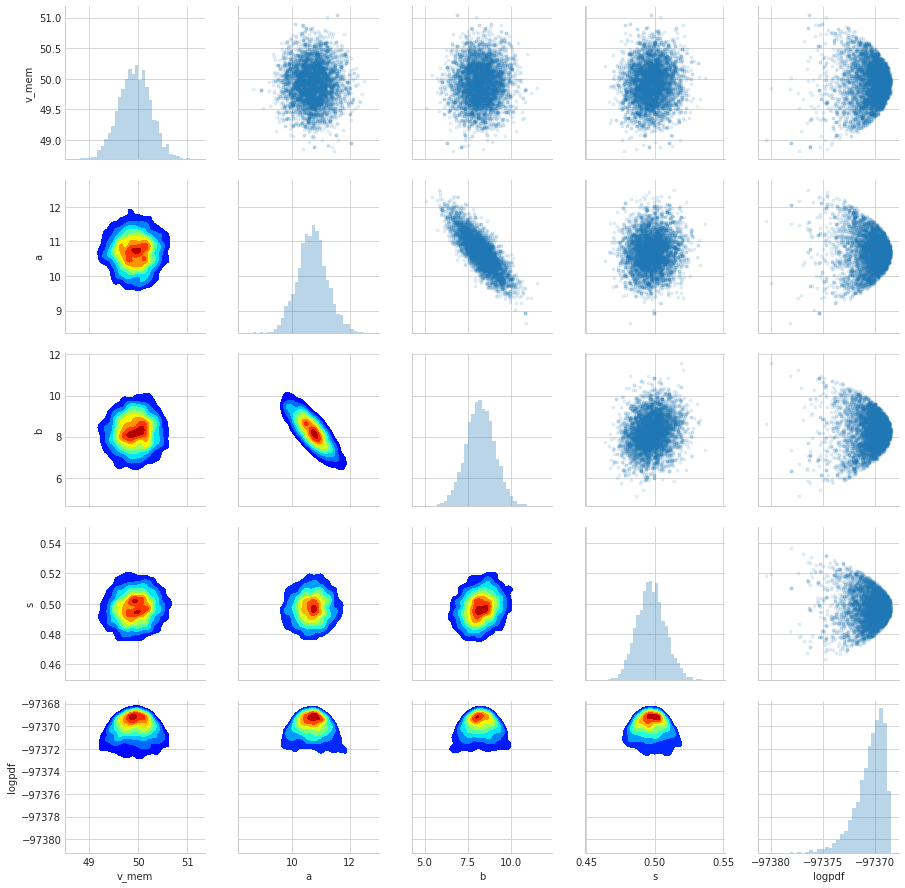

In [47]:
mcchain = pd.read_csv("params_chain_KI17_v003.csv")[-25000::5]
args_parameterplot  = {"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
#args_parameterplot  = {"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
#g = sns.pairplot(mcchain,**args_parameterplot)
#g = sns.PairGrid(mcchain)
#g = g.map_upper(plt.scatter,**{"s":8,"marker":"o","alpha":0.2})
#g = g.map_lower(sns.kdeplot,shade=True,shade_lowest=False,cmap="jet")
#g = g.map_diag(plt.hist, **{"bins":32,"histtype":"stepfilled","alpha":0.3})
mypairplot(mcchain)

Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

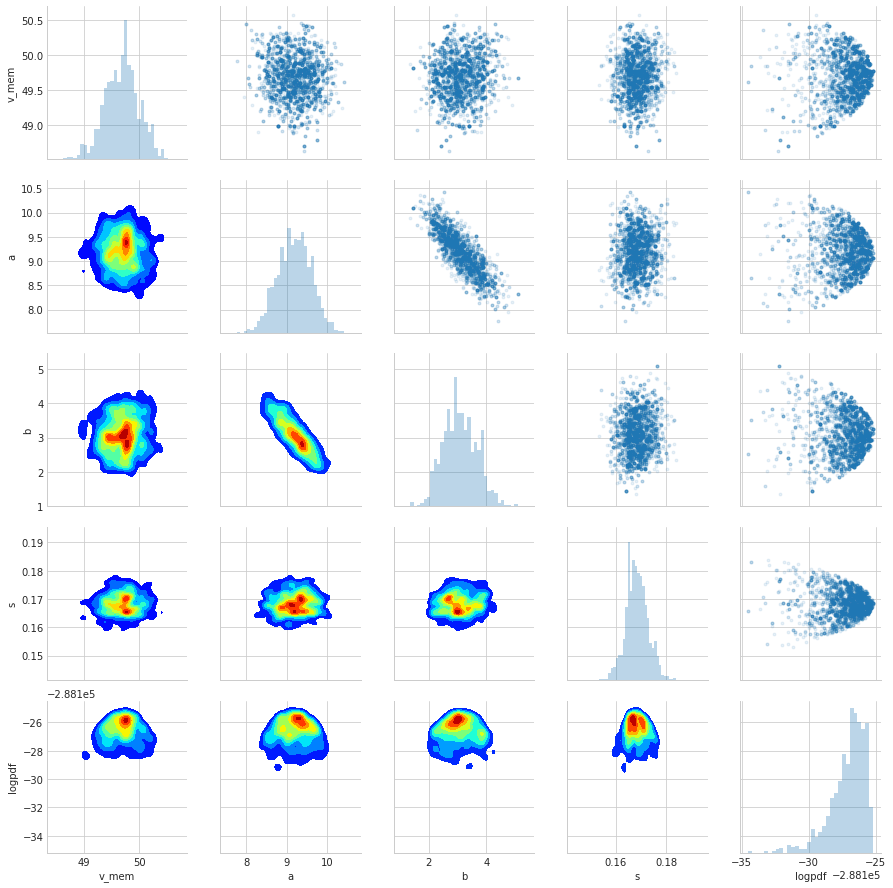

In [6]:
mcchain = pd.read_csv("params_chain_KI17_flatten_v002.csv")[5000::5]
args_parameterplot  = {"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
#args_parameterplot  = {"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
mypairplot(mcchain)

Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

,v_mem,a,b,s,logpdf
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,51.509250,10.126996,27.401873,0.999272,-154754.551680
std,0.167108,0.235848,0.662091,0.000288,0.891303
min,51.247140,9.763263,26.005229,0.997946,-154757.520034
16%,51.268443,9.763263,26.542398,0.999062,-154755.438389
50%,51.496566,10.152807,27.496264,0.999214,-154754.898435
84%,51.670114,10.387670,28.364161,0.999582,-154753.416795
max,52.023540,10.585863,28.572035,0.999718,-154753.416795


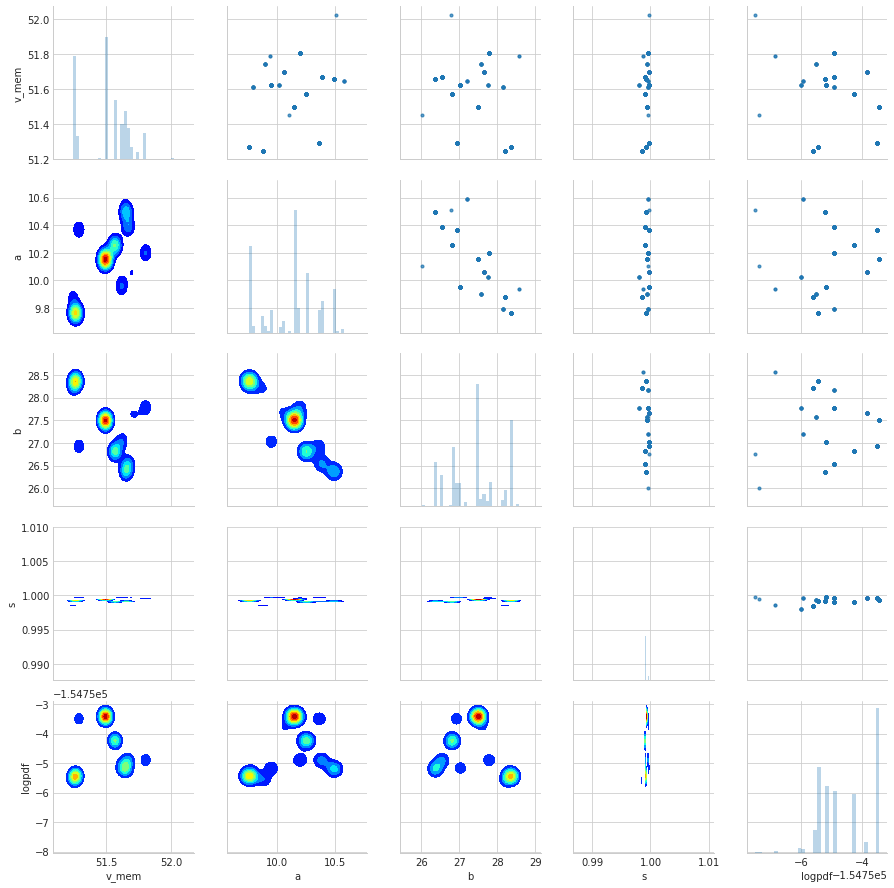

In [5]:
mcchain = pd.read_csv("params_chain_KI17_plummerlike_v003.csv")[5000::5]
args_parameterplot  = {"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
#args_parameterplot  = {"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
mypairplot(mcchain)
mcchain.describe(percentiles=(.16,.5,.84))

In [4]:
pd.read_csv("mclog_KI17_flatten_v002.csv")

,a,b,s,v_mem,iter_num
0,1.000000,1.000000,0.010000,1.000000,1000
1,1.038528,1.105131,0.057520,0.398154,1000
2,0.811957,0.904386,0.041596,0.303178,1000
3,0.697283,0.803024,0.034392,0.294166,1000
4,0.631707,0.758482,0.030089,0.278712,1000
5,0.597497,0.729343,0.027054,0.282698,20000


## MCMC: modified KI17

Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

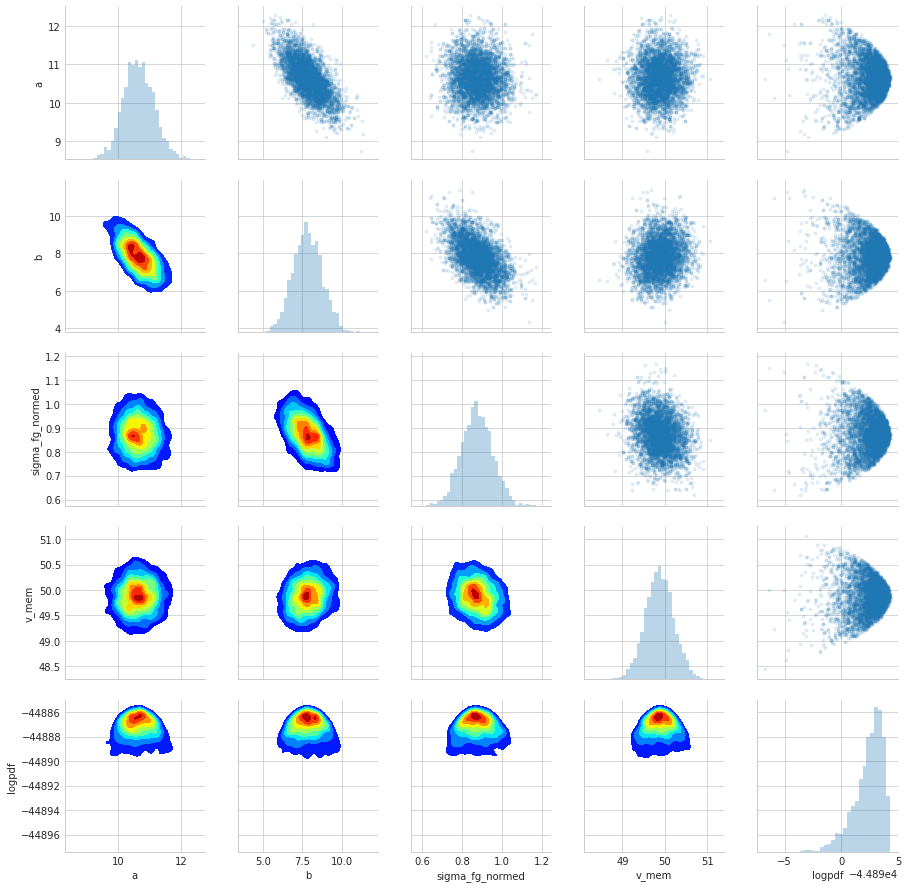

In [2]:
mcchain = pd.read_csv("params_chain_modKI17_v004.csv")[-25000::5]
args_parameterplot  = {"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
#args_parameterplot  = {"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
mypairplot(mcchain,vars=("a","b","sigma_fg_normed","v_mem","logpdf"))

In [3]:
pd.read_csv("mclog_modKI17_v004.csv")

,a,b,sigma_fg_normed,v_mem,iter_num
0,0.200000,0.200000,0.010000,0.200000,5000
1,0.503530,1.032966,0.090132,0.333383,5000
2,0.473493,0.890857,0.079955,0.309114,25000


Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

,v_mem,a,b,sigma_fg_normed,logpdf
count,12003.000000,12003.000000,12003.000000,12003.000000,12003.000000
mean,49.296619,11.103821,13.372800,0.478629,-24987.667780
std,0.617516,0.939735,2.185522,0.154451,1.426152
min,46.979486,7.869841,6.173572,0.068891,-24997.227022
16%,48.671038,10.153044,11.219801,0.321733,-24988.995763
50%,49.301012,11.092840,13.290934,0.469024,-24987.333109
84%,49.910764,12.022808,15.593166,0.634566,-24986.372566
max,51.502345,15.066611,21.525429,1.128345,-24985.688324


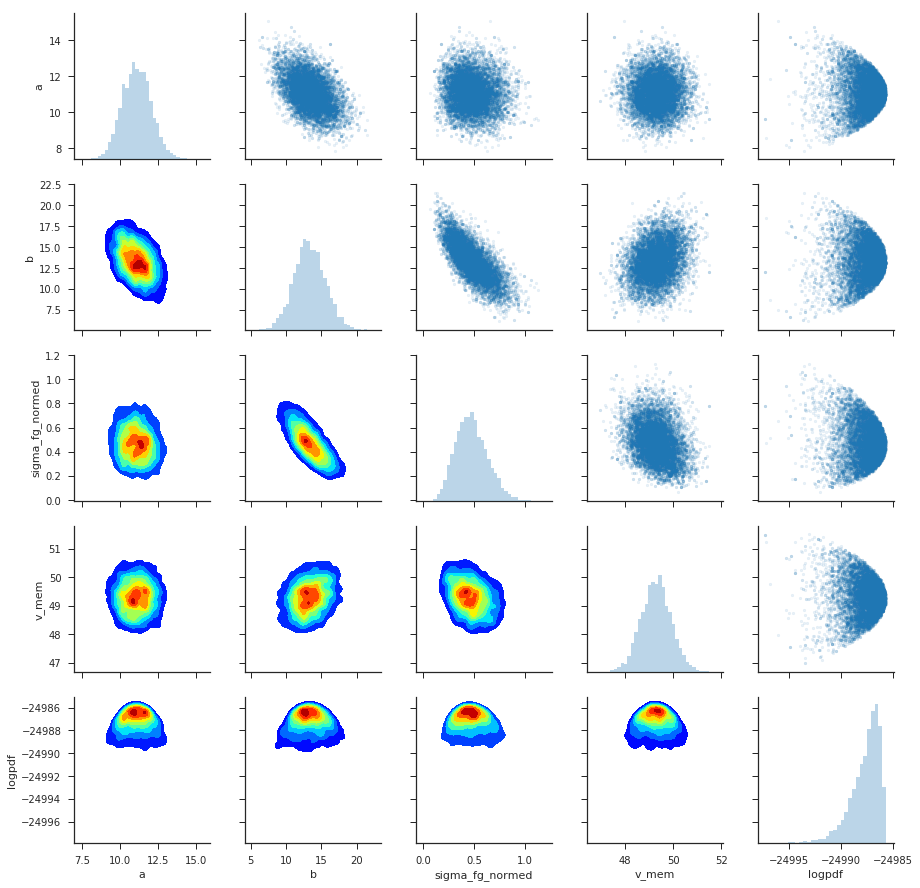

In [126]:
mcchains = [pd.read_csv("params_chain_modKI17_flatten_"+v+".csv")[5000::5] for v in ("v001","v002","v003")]
mcchain = pd.concat(mcchains,ignore_index=True)
args_parameterplot  = {"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
#args_parameterplot  = {"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
mypairplot(mcchain,vars=("a","b","sigma_fg_normed","v_mem","logpdf"))
mcchain.describe(percentiles=(.16,.5,.84))

Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

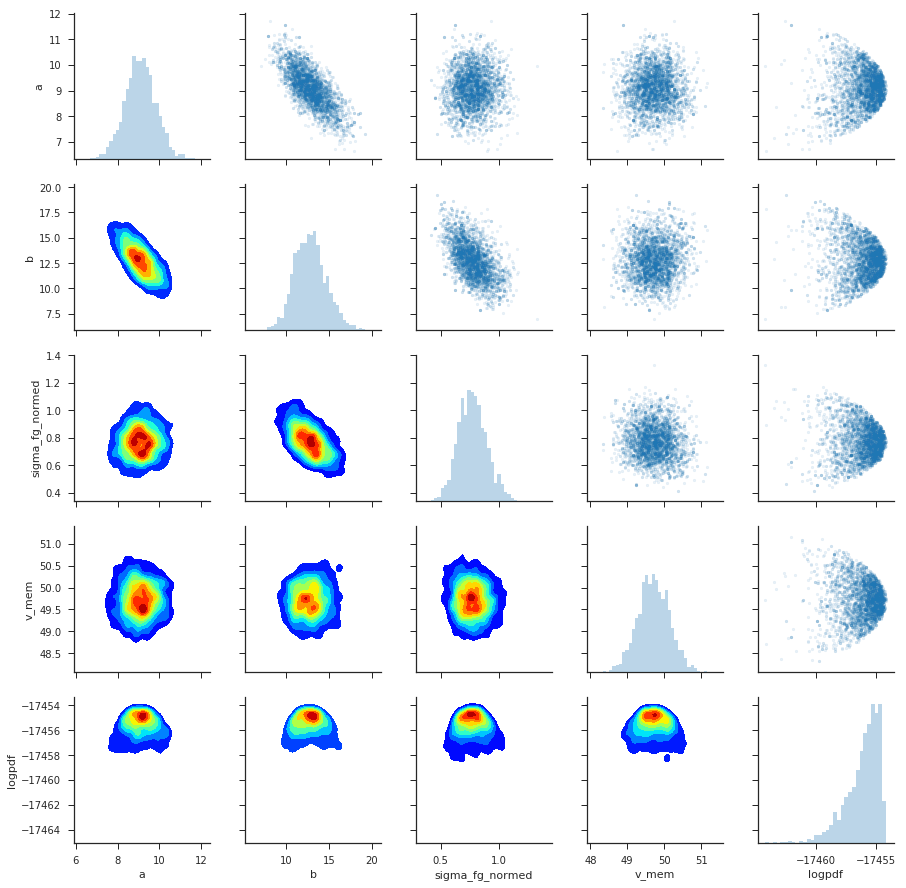

In [128]:
mcchain = pd.read_csv("params_chain_modKI17_plummerlike_v002.csv")[5000::5]
args_parameterplot  = {"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
#args_parameterplot  = {"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
mypairplot(mcchain,vars=("a","b","sigma_fg_normed","v_mem","logpdf"))

## narrowed version (a = 30, b = -10)

Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

,v_mem,a,b,sigma_fg_normed,logpdf
count,8002.000000,8002.000000,8002.000000,8002.000000,8002.000000
mean,50.229089,29.994447,-9.496595,0.736825,-234577.154005
std,0.215815,0.468504,0.397464,0.037165,1.483967
min,49.418992,28.067578,-10.740715,0.617382,-234586.332062
16%,50.009744,29.503524,-9.888746,0.700480,-234578.493729
50%,50.236172,30.008011,-9.507691,0.735141,-234576.840435
84%,50.440894,30.410109,-9.079794,0.774525,-234575.883920
max,50.882466,31.588269,-8.209281,0.876503,-234575.068662


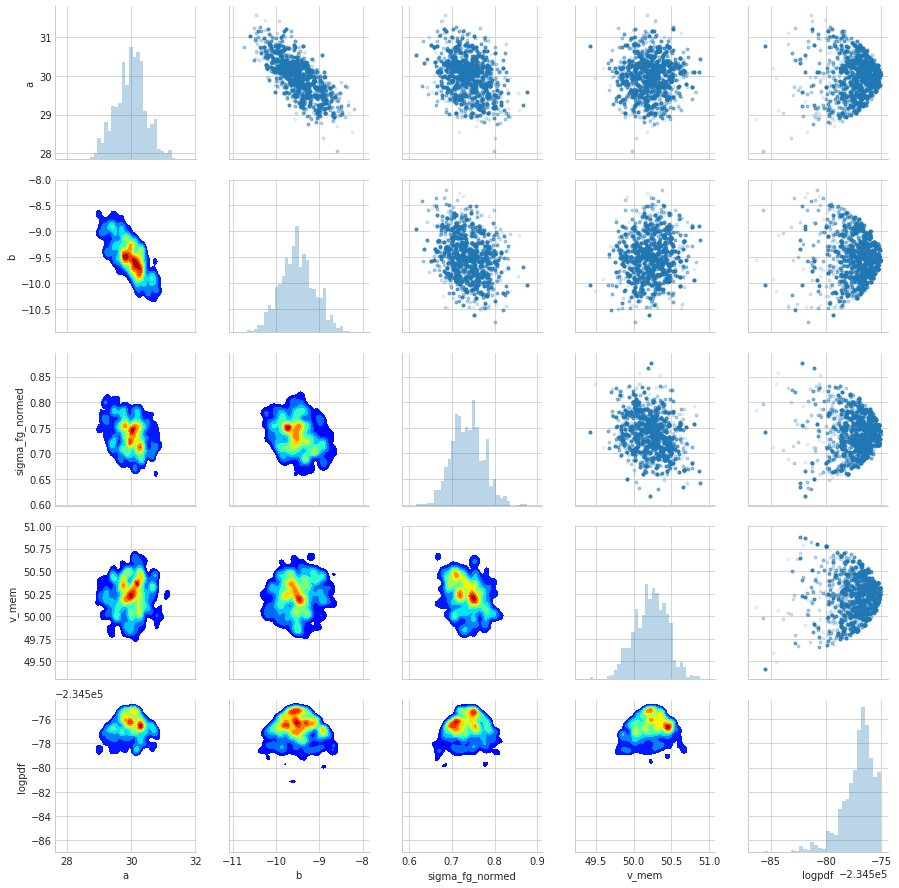

In [16]:
mcchains = [pd.read_csv("params_chain_modKI17_narrowed_"+v+".csv")[head::5] for v,head in zip(("v001","v002"),(5000,20000))]
mcchain = pd.concat(mcchains,ignore_index=True)
args_parameterplot  = {"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
#args_parameterplot  = {"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
mypairplot(mcchain,vars=("a","b","sigma_fg_normed","v_mem","logpdf"))
mcchain.describe(percentiles=(.16,.5,.84))

In [25]:
pd.read_csv("mclog_modKI17_narrowed_v002.csv")

,a,b,sigma_fg_normed,v_mem,iter_num
0,0.200000,0.200000,0.010000,0.200000,10000
1,2.229253,3.015001,0.077292,0.260760,10000
2,1.612592,2.160142,0.058571,0.241623,20000


In [31]:
pd.read_csv("params_chain_modKI17_narrowed_v002.csv")[20000:].describe()

,v_mem,a,b,sigma_fg_normed,logpdf
count,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000
mean,50.245113,30.016337,-9.501362,0.733689,-234577.077908
std,0.206458,0.455531,0.404219,0.036763,1.426462
min,49.546437,28.067578,-10.740715,0.630023,-234585.728803
25%,50.090877,29.727698,-9.736085,0.708194,-234577.742022
50%,50.253687,30.060810,-9.512568,0.731170,-234576.791095
75%,50.406895,30.282411,-9.226309,0.757541,-234576.150749
max,50.777492,31.242314,-8.209281,0.856489,-234575.081015


In [32]:
pd.read_csv("params_chain_modKI17_narrowed_v002.csv")[10000:20000].describe()

,v_mem,a,b,sigma_fg_normed,logpdf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.220181,29.901090,-9.362104,0.729344,-234577.157603
std,0.220805,0.422043,0.357863,0.029606,1.213495
min,49.630517,28.670460,-10.313496,0.659486,-234580.583487
25%,50.061316,29.563143,-9.653563,0.707342,-234578.155618
50%,50.240206,29.927791,-9.447650,0.730127,-234576.856787
75%,50.381873,30.184719,-9.020928,0.741836,-234576.437276
max,50.737520,31.125376,-8.383409,0.809202,-234575.293817


Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

,v_mem,a,b,s,logpdf
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,50.162676,29.633544,-9.538761,0.499218,-505280.182816
std,0.198058,0.398854,0.330223,0.004585,1.243301
min,49.525915,28.625526,-10.877165,0.484037,-505287.729651
16%,49.965318,29.176528,-9.879734,0.495266,-505281.291544
50%,50.162528,29.621882,-9.545303,0.499111,-505279.878562
84%,50.328833,30.063871,-9.187873,0.503759,-505279.095166
max,50.789124,31.115686,-8.627784,0.512310,-505278.433692


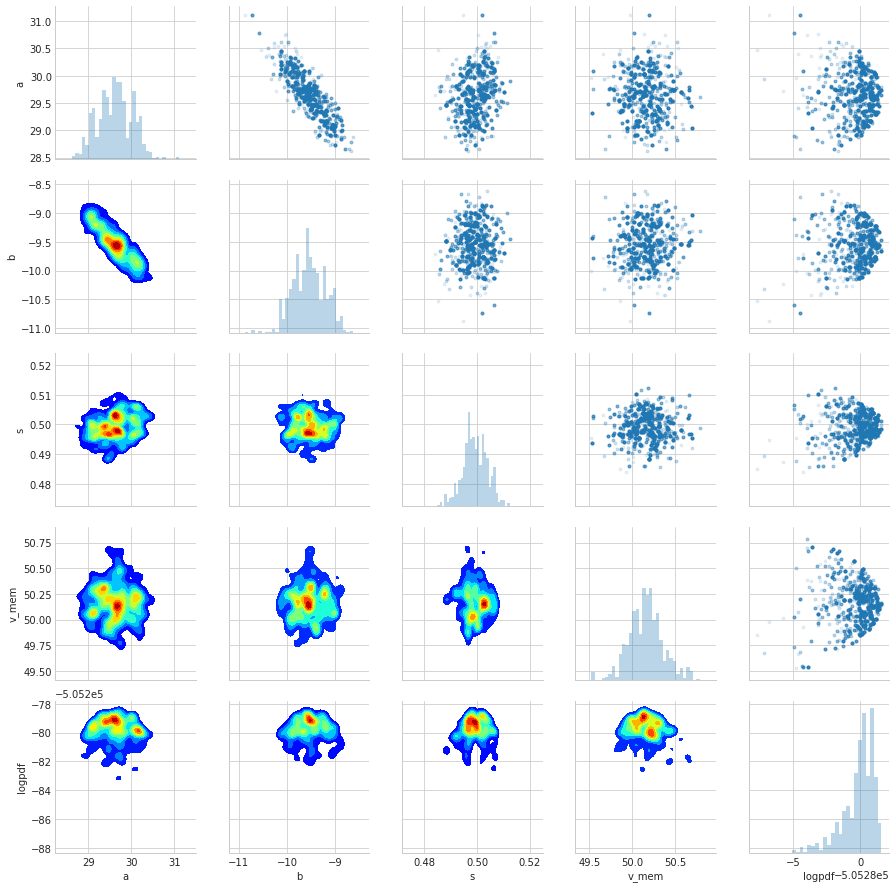

In [18]:
mcchains = [pd.read_csv("params_chain_KI17_narrowed_"+v+".csv")[head::5] for v,head in zip(("v001",),(5000,))]
mcchain = pd.concat(mcchains,ignore_index=True)
args_parameterplot  = {"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
#args_parameterplot  = {"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
mypairplot(mcchain,vars=("a","b","s","v_mem","logpdf"))
mcchain.describe(percentiles=(.16,.5,.84))

In [ ]:
'''
p(R) = \tilde{Sigma}(R)\mathcal{G}(R)/( \tilde{Sigma}(R)\mathcal{G}(R) + \tilde{Sigma}_fg(R)\mathcal{G}(R_0))
--> \tilde{Sigma}_fg = ((1-p(R))/p(R) * \tilde{Sigma}(R))*(mathcal{G}(R)/\mathcal{G}(R_0)) 
'''

delta_R_list = np.linspace(0,model.RoI_R,21)
delta_R_center_list = (delta_R_list[1:]+delta_R_list[:-1])/2
def num_in_delta_R_list(R):
    _R = np.array(R).reshape((1,-1))
    _delta_R_list = delta_R_list.reshape((-1,1))
    is_in_delta_R_list = np.logical_and(_delta_R_list[:-1]<=_R,_R<_delta_R_list[1:])
    return np.sum(isin_delta_R_list,axis=0)
n_mem_list,n_fg_list = []*20,[]*20
for i in range(len(delta_R_list)-1):
    n_mem[i],n_fg[i] = np.sum(isin_delta_R(i,mock_mem.R)),np.sum(isin_delta_R(i,mock_fg.R))

In [ ]:
できたMockの分布はちゃんとしているか？
f_mem がちゃんとふれているか？（F_memだけのモデルでちゃんとFitできているか？）
f_totに基づいてmockを作るとどうなるか？